In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 让图片中可以显示中文
plt.rcParams['font.sans-serif'] = 'SimHei'
# 让图片中可以显示负号
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv("lagou.csv")

company  foursquare  trend  \
0    YIDATEC    移动互联网,游戏  不需要融资   
1       希为科技     企业服务,金融  不需要融资   
2         传易    移动互联网,社交  不需要融资   
3       盛业资本     金融,数据服务   上市公司   
4        路行通  移动互联网,消费生活  不需要融资   
..       ...         ...    ...   
431       友朋        消费生活     A轮   
432     艾宝电子          电商  不需要融资   
433     点购商城          金融  D轮及以上   
434     有伴科技    移动互联网,教育     C轮   
435       有赞        企业服务   上市公司   

                                            figure               job   salary  \
0                                          2000人以上             数据分析师   7k-10k   
1                                          50-150人             数据分析师  15k-25k   
2                                         150-500人    数据分析专员(J10236)  10k-15k   
3                                         150-500人             数据分析师  15k-30k   
4                                        500-2000人  数据分析师（碰撞场景探索与...  14k-20k   
..                                             ...               ...      ...   
431  猎豹移动战略领投、万利加集团追投(A轮)，华盖资本、万利加集团(A轮)，华盖资本(天使轮)             新媒体运营    6k-9k   
432                                        50-150人              淘宝运营    4k-7k   
433                                      500-2000人              招商专员    4k-6k   
434                               奥飞动漫(天使轮)，保密(A轮)           数据挖掘工程师  15k-25k   
435                                        2000人以上    商家服务经理-新零售（深圳）  10k-15k   

    experience education                                        description  \
0      经验1-3年     本科及以上   1、1年以上数据分析\数据运营相关工作经验；2、接触过Android App运营、对App质...   
1      经验1-3年     本科及以上   职位诱惑：14薪；年轻有活力的团队；五险一金；职位描述：岗位职责:1.深入理解业务，通过数据...   
2        经验不限      学历不限   工作职责:1、负责运营数据整理规划工作，监控日常关键数据并分析异常变化，提交数据分析报告；2...   
3      经验3-5年      学历不限   岗位职责:1、基于业务需求，规划分析思路，完成从数据提取、数据清洗、数据分析和报告产出的整个...   
4      经验3-5年     本科及以上   岗位职责：1.负责车辆碰撞场景的深度探索及数据建模。2.负责车辆碰撞数据的新特征挖掘和衍生，...   
..         ...       ...                                                ...   
431      经验不限     大专及以上   岗位职责：1、通过微信、微博等互联网渠道，建设品牌形象，扩大品牌影响力；2、独立负责微信公众...   
432    经验1-3年     大专及以上   岗位职责：1、熟练操作SEO优化，负责公司天猫、淘宝平台的日常运营管理，包括店铺整体策划、交...   
433    经验1-3年     大专及以上   任职要求：1、大专及以上学历，专业不限，22-35岁；2、三年以上招商销售相关经验，有平台电...   
434    经验1-3年     硕士及以上   职位描述：1.参与构建并完善数据分析体系；2.对数据进行搜集，清洗、特征提取、分析建模，数据...   
435      经验不限      学历不限   岗位职责1. 商家建联：按照行业或经营特性，付费商家“建联”，在付费后1-30天内，协助商家...   

    address  
0       南山区  
1       南山区  
2       南山区  
3       福田区  
4       南山区  
..      ...  
431     南山区  
432     龙岗区  
433     南山区  
434     南山区  
435     南山区  

[436 rows x 10 columns]

In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company      436 non-null    object
 1   foursquare   436 non-null    object
 2   trend        436 non-null    object
 3   figure       436 non-null    object
 4   job          436 non-null    object
 5   salary       436 non-null    object
 6   experience   436 non-null    object
 7   education    436 non-null    object
 8   description  436 non-null    object
 9   address      436 non-null    object
dtypes: object(10)
memory usage: 34.2+ KB


company        0
foursquare     0
trend          0
figure         0
job            0
salary         0
experience     0
education      0
description    0
address        0
dtype: int64

In [6]:
def fun(x):
	if "移动互联网" in x:
		return "移动互联网"
	else:
		return "非移动互联网"
df["company_type"] = df["foursquare"].apply(fun)
df["company_type"]

0       移动互联网
1      非移动互联网
2       移动互联网
3      非移动互联网
4       移动互联网
        ...  
431    非移动互联网
432    非移动互联网
433    非移动互联网
434     移动互联网
435    非移动互联网
Name: company_type, Length: 436, dtype: object

In [17]:
def fun(x):
	# "金融,移动互联网"
	# "移动互联网,金融"
	# “移动互联网，金融，企业服务”
	# “电商”
	if x == "移动互联网":
		return np.nan
	if "移动互联网" in x:
		if "移动互联网" == x.split(",")[-1]:
			return x.split(",")[0]
		else:
			return x.split(",")[-1]
	else:
		return x
df["company_attr"]= df["foursquare"].apply(fun)

In [19]:
df["company_attr"].isnull().sum()
df.fillna("其他",inplace=True)

In [23]:
def fun(x):
	 if "上市公司" == x or "不需要融资" == x:
		 return "是"
	 else:
		 return "否"

df["company_up"]= df["trend"].apply(fun)

In [27]:
def fun(x):
	 if "上市公司" == x:
		 return "完成融资"
	 else:
		 return x

df["company_money"]= df["trend"].apply(fun)

In [37]:
def fun(x):
	if "150人" in x:
		return  "100+"
	elif "500人" in x:
		return "500+"
	elif "2000人" in x:
		return "1000+"
	elif "以下" in x:
		return "10+"
	elif "以上" in x:
		return "2000+"
	else:
		return np.nan
df["company_person"] = df["figure"].apply(fun)

In [38]:
df["company_person"].fillna("0")


0      1000+
1       100+
2       500+
3       500+
4      1000+
       ...  
431        0
432     100+
433    1000+
434        0
435    1000+
Name: company_person, Length: 436, dtype: object

In [41]:
def fun(x):
	if "商业" in x:
		return "商业数据分析师"
	else:
		return "实习数据分析师"
df["job_type"] = df["job"].apply(fun)
df["job_type"]

0      实习数据分析师
1      实习数据分析师
2      实习数据分析师
3      实习数据分析师
4      实习数据分析师
        ...   
431    实习数据分析师
432    实习数据分析师
433    实习数据分析师
434    实习数据分析师
435    实习数据分析师
Name: job_type, Length: 436, dtype: object

In [42]:
def fun(x):
	if "1-3" in x:
		return  "1年+"
	elif "3-5" in x:
		return "3年+"
	elif "5-10" in x:
		return "5年+"
	elif "以下" in x or "应届" in x:
		return "1年-"
	elif "以上" in x or "不限" in x:
		return "10年"
	else:
		return np.nan
df["experience_type"] = df["experience"].apply(fun)


In [54]:
import re
def fun(x):
	return re.findall('[a-zA-Z]+',x)
df["description_type"] = df["description"].apply(fun)

In [55]:
df["description_type"]


0                [Android, App, App, excel, python, SQL]
1                    [Hadoop, SQL, Hive, SAS, R, python]
2                                                  [SQL]
3                           [Excel, PPT, R, python, SQL]
4                                    [Python, MATLAB, R]
                             ...                        
431                                                [SNS]
432                                                [SEO]
433                                                [KPI]
434    [linux, c, python, java, hadoop, spark, tensor...
435                                            [saas, C]
Name: description_type, Length: 436, dtype: object

In [71]:
df["description_type_num"] = df["description_type"].apply(lambda  x:len(x))
df["description_type_num"]

0      6
1      6
2      1
3      5
4      3
      ..
431    1
432    1
433    1
434    7
435    2
Name: description_type_num, Length: 436, dtype: int64

In [79]:
data1 = df.groupby(["company_attr","job_type"])["description_type_num"].nunique().unstack().fillna(0)
data1

job_type      商业数据分析师  实习数据分析师
company_attr                  
不限                0.0      1.0
人工智能              1.0      6.0
企业服务              0.0     10.0
企业服务,其他           0.0      3.0
企业服务,数据服务         1.0      3.0
企业服务,金融           0.0      4.0
信息安全              0.0      3.0
信息安全,数据服务         0.0      2.0
其他                2.0     17.0
区块链               0.0      3.0
医疗丨健康             0.0      6.0
医疗丨健康,其他          0.0      1.0
大数据               0.0      1.0
工具                0.0      1.0
广告营销              0.0      4.0
广告营销,企业服务         0.0      1.0
房产家居              0.0      5.0
教育                0.0     10.0
数据服务              2.0      7.0
数据服务,电商           1.0      0.0
数据服务,金融           0.0      1.0
文娱丨内容             0.0      7.0
旅游                0.0      6.0
汽车丨出行             0.0      3.0
消费生活              2.0     12.0
消费生活,文娱丨内容        0.0      1.0
游戏                0.0     10.0
物流丨运输             0.0      2.0
物联网               0.0      1.0
电商                1.0     15.0
电商,其他             0.0      3.0
电商,广告营销           0.0      1.0
电商,数据服务           0.0      1.0
电商,消费生活           0.0      4.0
电商,硬件             0.0      3.0
硬件                2.0     11.0
社交                0.0      9.0
社交,消费生活           0.0      1.0
通讯电子              0.0      1.0
金融                1.0     23.0
金融,区块链            0.0      1.0
金融,数据服务           0.0      5.0

<BarContainer object of 10 artists>

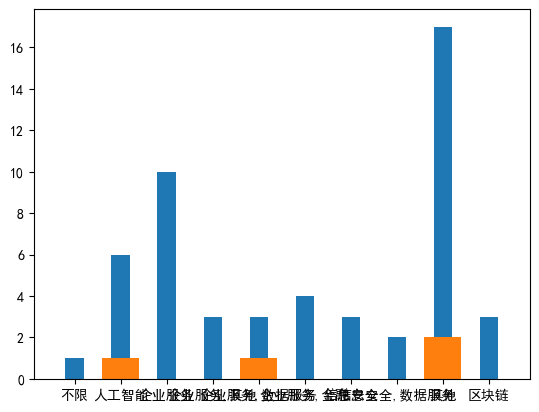

In [94]:
data2 = data1.iloc[:10]
# plt.plot(data2.index,data2.values)
# plt.xticks(rotation=45)

# data2.plot.bar()

#todo 用plt化成两个图
plt.bar(data2.index,data2["实习数据分析师"],width=0.4)
plt.bar(data2.index,data2["商业数据分析师"],width=0.8)

<BarContainer object of 8 artists>

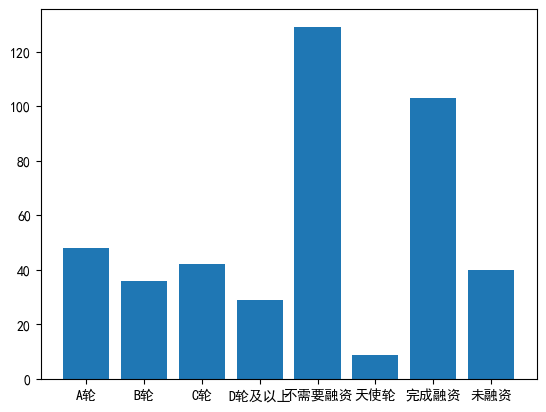

In [107]:
data3 = df.groupby("company_money")["job_type"].count()
plt.bar(data3.index,data3.values)


In [124]:
clean_salary = [re.sub('[k|K]','',i) for i in df.salary]

# 将salary数据转换为DataFrame格式
salary = pd.DataFrame(clean_salary,columns = ['salary'])
salary_s = pd.DataFrame((x.split('-') for x in salary['salary']),columns = ['bottomSalary','topSalary'])
# 更改字段格式
df['bottomSalary']=salary_s['bottomSalary'].astype(np.object_)
df['topSalary']=salary_s['topSalary'].astype(np.object_)

In [120]:
df[(df["experience_type"]=="1年+" ) | (df["experience_type"]=="3年+")].groupby(["company_attr","job_type"])["job_type"].count().unstack()

job_type      商业数据分析师  实习数据分析师
company_attr                  
人工智能              1.0      8.0
企业服务              NaN     19.0
企业服务,其他           NaN      3.0
企业服务,数据服务         1.0      1.0
企业服务,金融           NaN      6.0
信息安全              NaN      3.0
信息安全,数据服务         NaN      1.0
其他                2.0     27.0
区块链               NaN      4.0
医疗丨健康             NaN      4.0
医疗丨健康,其他          NaN      1.0
大数据               NaN      1.0
工具                NaN      1.0
广告营销              NaN      2.0
广告营销,企业服务         NaN      1.0
房产家居              NaN      4.0
教育                NaN     12.0
数据服务              1.0      3.0
数据服务,电商           1.0      NaN
文娱丨内容             NaN      6.0
旅游                NaN      6.0
汽车丨出行             NaN      2.0
消费生活              NaN     18.0
消费生活,文娱丨内容        NaN      1.0
游戏                NaN     21.0
物流丨运输             NaN      2.0
电商                1.0     38.0
电商,其他             NaN      2.0
电商,消费生活           NaN      3.0
电商,硬件             NaN      3.0
硬件                2.0     12.0
社交                NaN     11.0
通讯电子              NaN      1.0
金融                NaN     67.0
金融,数据服务           NaN      3.0

In [127]:
df[(df["experience_type"]=="1年+" ) | (df["experience_type"]=="3年+")].groupby(["company_attr","salary"])["salary"].count().unstack().fillna(0)


salary        10k-12k  10k-15k  10k-16k  10k-17k  10k-18k  10k-19k  10k-20k  \
company_attr                                                                  
人工智能              0.0      0.0      1.0      0.0      0.0      0.0      0.0   
企业服务              0.0      0.0      0.0      1.0      0.0      0.0      4.0   
企业服务,其他           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
企业服务,数据服务         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
企业服务,金融           0.0      0.0      0.0      0.0      0.0      0.0      1.0   
信息安全              0.0      0.0      0.0      0.0      0.0      0.0      0.0   
信息安全,数据服务         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
其他                0.0      2.0      0.0      0.0      0.0      0.0      1.0   
区块链               0.0      1.0      0.0      0.0      0.0      0.0      3.0   
医疗丨健康             0.0      0.0      0.0      0.0      0.0      0.0      2.0   
医疗丨健康,其他          0.0      0.0      0.0      0.0      0.0      0.0      0.0   
大数据               0.0      0.0      0.0      0.0      0.0      1.0      0.0   
工具                0.0      0.0      0.0      0.0      0.0      0.0      0.0   
广告营销              0.0      0.0      0.0      0.0      0.0      0.0      0.0   
广告营销,企业服务         0.0      0.0      0.0      0.0      0.0      0.0      0.0   
房产家居              1.0      0.0      0.0      0.0      0.0      0.0      0.0   
教育                0.0      1.0      1.0      0.0      0.0      0.0      0.0   
数据服务              0.0      0.0      0.0      0.0      0.0      0.0      1.0   
数据服务,电商           0.0      0.0      0.0      0.0      0.0      0.0      1.0   
文娱丨内容             0.0      0.0      0.0      0.0      0.0      0.0      1.0   
旅游                0.0      0.0      0.0      0.0      0.0      0.0      1.0   
汽车丨出行             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
消费生活              0.0      0.0      0.0      0.0      0.0      0.0      0.0   
消费生活,文娱丨内容        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
游戏                0.0      2.0      0.0      0.0      1.0      0.0      3.0   
物流丨运输             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
电商                0.0      6.0      0.0      0.0      0.0      0.0      4.0   
电商,其他             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
电商,消费生活           0.0      0.0      0.0      0.0      0.0      0.0      0.0   
电商,硬件             0.0      0.0      0.0      0.0      0.0      0.0      0.0   
硬件                0.0      1.0      0.0      0.0      0.0      0.0      1.0   
社交                0.0      0.0      0.0      0.0      0.0      0.0      1.0   
通讯电子              0.0      0.0      0.0      0.0      0.0      0.0      0.0   
金融                0.0      4.0      1.0      0.0      1.0      0.0      4.0   
金融,数据服务           0.0      0.0      0.0      0.0      0.0      0.0      0.0   

salary        11k-15k  11k-18k  11k-22k  ...  8k-10k  8k-11k  8k-12k  8k-13k  \
company_attr                             ...                                   
人工智能              0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
企业服务              0.0      0.0      0.0  ...     1.0     0.0     0.0     0.0   
企业服务,其他           0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
企业服务,数据服务         0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
企业服务,金融           0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
信息安全              0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
信息安全,数据服务         0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
其他                0.0      0.0      1.0  ...     2.0     1.0     0.0     0.0   
区块链               0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
医疗丨健康             0.0      0.0      0.0  ...     0.0     0.0     1.0     0.0   
医疗丨健康,其他          0.0      0.0      0.0  ...     0.0     0.0     0.0     0.0   
大数据               0.0      0.0      

In [128]:
def fun(x):
	if x == "2000+":
		return "一"
	elif x == "100+":
		return "三"
	else:
		return "二"
df["company_grade"] = df["company_person"].apply(fun)
df["company_grade"]

0      二
1      三
2      二
3      二
4      二
      ..
431    二
432    三
433    二
434    二
435    二
Name: company_grade, Length: 436, dtype: object

In [131]:
df.groupby(["company_grade","experience_type"])["experience_type"].count().unstack()


experience_type  10年  1年+  1年-  3年+  5年+
company_grade                           
一                  1    5    1    6    4
三                 10   24    1   24    4
二                 43   88   24  159   42

In [138]:
data4 = df.loc[df["company_grade"] == "一"][["salary"]]
data4

salary
12     3k-4k
21   18k-35k
27   15k-30k
53   15k-25k
99   18k-25k
106  10k-18k
130  50k-70k
155  15k-30k
186  10k-20k
211   6k-10k
219  12k-24k
220  20k-35k
249  30k-60k
288  18k-36k
328  18k-30k
341  15k-30k
342  15k-30k

In [141]:
data4["min_salary"] = data4["salary"].apply(lambda x : re.search("\d+",x).group())
data4

salary min_salary
12     3k-4k          3
21   18k-35k         18
27   15k-30k         15
53   15k-25k         15
99   18k-25k         18
106  10k-18k         10
130  50k-70k         50
155  15k-30k         15
186  10k-20k         10
211   6k-10k          6
219  12k-24k         12
220  20k-35k         20
249  30k-60k         30
288  18k-36k         18
328  18k-30k         18
341  15k-30k         15
342  15k-30k         15

{'whiskers': [<matplotlib.lines.Line2D at 0x21ee71e6be0>,
 'caps': [<matplotlib.lines.Line2D at 0x21ee72348b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ee71e68b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21ee7234df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ee723a880>],
 'means': []}

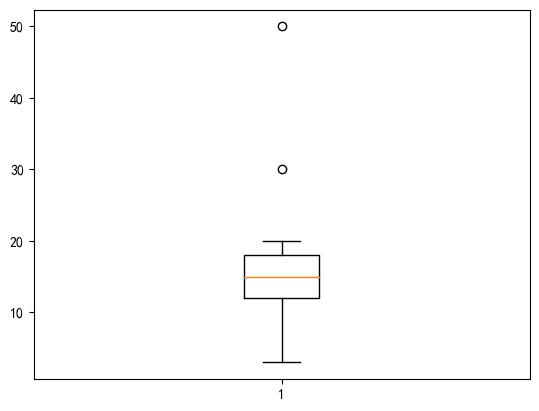

In [145]:
data4["min_salary"] = data4["min_salary"].astype(np.float64)
plt.boxplot(data4["min_salary"] )

ValueError: X must have 2 or fewer dimensions

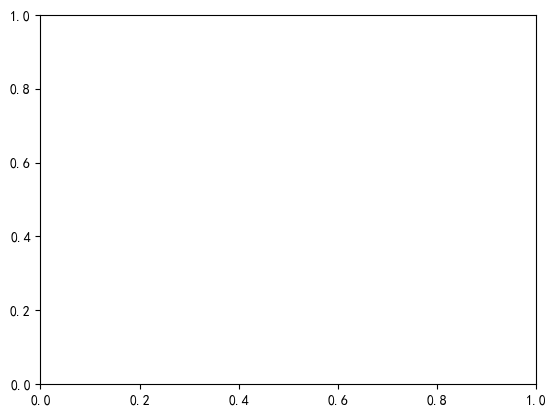

In [148]:
def show(g):
	data4 = df.loc[df["company_grade"] == g][["salary"]]
	data4["min_salary"] = data4["salary"].apply(lambda x : re.search("\d+",x).group())
	data4["min_salary"] = data4["min_salary"].astype(np.float64)
	return data4


{'whiskers': [<matplotlib.lines.Line2D at 0x21ee779f370>,
 'caps': [<matplotlib.lines.Line2D at 0x21ee779f910>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ee779f040>,
 'medians': [<matplotlib.lines.Line2D at 0x21ee779feb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x21ee77b0820>,
 'means': []}

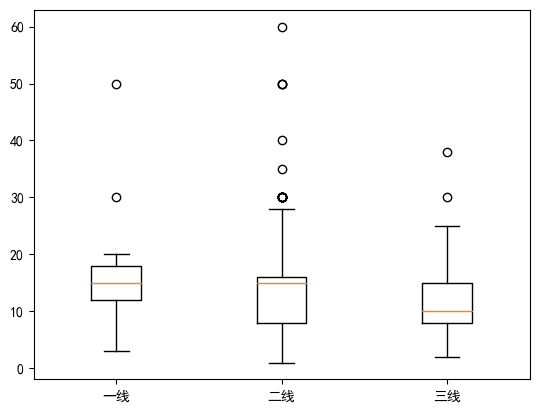

In [151]:
l = []
for i in ["一","二","三"]:
	data5 = show(i)
	l.append(data5)
plt.boxplot((l[0]["min_salary"],l[1]["min_salary"],l[2]["min_salary"]),labels=('一线','二线','三线'))
